In [1]:
from astropy.io import fits
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file_names = glob('/Users/chris/Desktop/uf_grad_school/obs_tech/ccd_lab/read_noise_and_dark_current/*.fits')
images = []
for i in range(len(file_names)):
    images.append(fits.getdata(np.sort(file_names)[i]))

In [3]:
im_array = np.array(images)

In [4]:
im_array.shape

(29, 2532, 3352)

### Read noise

In [5]:
read_noise_array = im_array[1:10,:,:] # first exposure was erroneous
dark_current_array = im_array[16:,:,:]

In [6]:
b1 = np.mean(1.0*read_noise_array, axis=0)
b2 = np.mean((1.0*read_noise_array)**2, axis=0)
std1 = np.std(1.0*read_noise_array, axis=0)
#print(np.median(std1))
#std2 = np.std(1.0*im_array[10:12,:,:], axis=0)
#print(np.median(std2))

In [7]:
# rms array
sd = np.sqrt((b2 - b1*b1))
print(np.where(np.isnan(im_array**2)))
print(sd.shape)

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))
(2532, 3352)


In [8]:
print(np.median(sd[:, :]))

25.086516962967494


In [9]:
print(np.mean(sd[:, :]))
print(np.mean(sd[:, :])/np.sqrt(im_array.shape[1]*im_array.shape[2]))

25.390012509213857
0.008715234140128663


In [10]:
print(np.std(sd[:, :]))
print(np.std(sd[:, :])/np.sqrt(im_array.shape[1]*im_array.shape[2]))

6.582725515186068
0.0022595496604905763


In [11]:
# read noise uncertainty is sqrt of number of pixels
read_noise_uncertainty = np.median(sd[:, :])/np.sqrt(im_array.shape[1]*im_array.shape[2])
print(read_noise_uncertainty)

0.00861105795096517


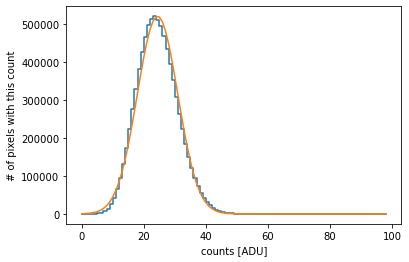

In [12]:
counts, bins = np.histogram(sd.ravel(), bins=np.arange(0, 100, 1))
from scipy.optimize import curve_fit
def gauss(x, a, mu, sigma):
          return a*np.exp(-.5*(x-mu)**2/(sigma**2))

popt, pcov = curve_fit(gauss, xdata=bins[:-1], ydata=counts, p0=[1,1,1])
fit = gauss(bins[:-1], *popt)

plt.step(bins[:-1], counts)
plt.plot(bins[:-1], fit)
plt.ylabel('# of pixels with this count')
plt.xlabel('counts [ADU]')
plt.show()


In [13]:
popt

array([5.21315997e+05, 2.44348514e+01, 6.50257117e+00])

In [15]:
print(popt[1]/np.sqrt(im_array.shape[1]*im_array.shape[2]))
print(popt[2]/np.sqrt(im_array.shape[1]*im_array.shape[2]))

0.00838737087778138
0.0022320363278798003


In [ ]:
chi-squared = sum over (ydata - yfit)**2/sigma**2

In [23]:
read_noise_array = 1.0*im_array[10:13,:,:] # 3 1s exposures

In [24]:
b1 = np.mean(1.0*read_noise_array, axis=0)
b2 = np.mean((1.0*read_noise_array)**2, axis=0)
sd = np.sqrt((b2 - b1*b1))

print(np.median(sd[:, :]))
print(np.median(sd[:, :])/np.sqrt(im_array.shape[1]*im_array.shape[2]))

print(np.mean(sd[:, :]))
print(np.mean(sd[:, :])/np.sqrt(im_array.shape[1]*im_array.shape[2]))

print(np.std(sd[:, :]))
print(np.std(sd[:, :])/np.sqrt(im_array.shape[1]*im_array.shape[2]))

18.83259585576944
0.006464371858418172
20.083308195206957
0.006893684403112287
10.952075253543583
0.0037593482917861196


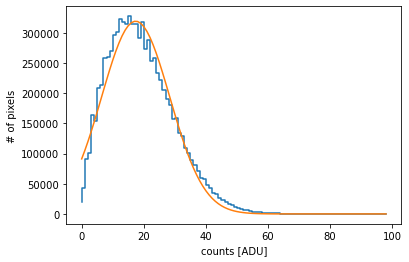

[3.19641216e+05 1.73883085e+01 1.09819528e+01]


In [25]:
counts, bins = np.histogram(sd.ravel(), bins=np.arange(0, 100, 1))
popt, pcov = curve_fit(gauss, xdata=bins[:-1], ydata=counts, p0=[1,1,1])
fit = gauss(bins[:-1], *popt)

plt.step(bins[:-1], counts)
plt.plot(bins[:-1], fit)
plt.ylabel('# of pixels')
plt.xlabel('counts [ADU]')
plt.show()

print(popt)

In [26]:
print(popt[1]/np.sqrt(im_array.shape[1]*im_array.shape[2]))
print(popt[2]/np.sqrt(im_array.shape[1]*im_array.shape[2]))

0.005968613834603777
0.003769603897513509


In [19]:
read_noise_array = 1.0*im_array[13:16,:,:] # 3 10s exposures

In [20]:
b1 = np.mean(1.0*read_noise_array, axis=0)
b2 = np.mean((1.0*read_noise_array)**2, axis=0)
sd = np.sqrt((b2 - b1*b1))

print(np.median(sd[:, :]))
print(np.median(sd[:, :])/np.sqrt(im_array.shape[1]*im_array.shape[2]))

print(np.mean(sd[:, :]))
print(np.mean(sd[:, :])/np.sqrt(im_array.shape[1]*im_array.shape[2]))

print(np.std(sd[:, :]))
print(np.std(sd[:, :])/np.sqrt(im_array.shape[1]*im_array.shape[2]))

18.926759422099053
0.006496693919218035
20.18433973671611
0.006928363926782111
10.656844139071145
0.0036580089053976843


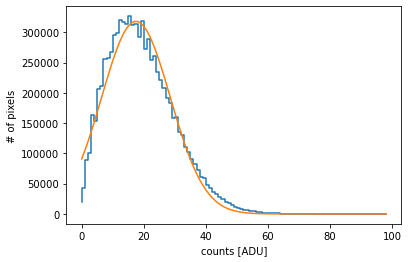

[3.18074465e+05 1.74753999e+01 1.10348088e+01]


In [21]:
counts, bins = np.histogram(sd.ravel(), bins=np.arange(0, 100, 1))
popt, pcov = curve_fit(gauss, xdata=bins[:-1], ydata=counts, p0=[1,1,1])
fit = gauss(bins[:-1], *popt)

plt.step(bins[:-1], counts)
plt.plot(bins[:-1], fit)
plt.ylabel('# of pixels')
plt.xlabel('counts [ADU]')
plt.show()

print(popt)

In [22]:
print(popt[1]/np.sqrt(im_array.shape[1]*im_array.shape[2]))
print(popt[2]/np.sqrt(im_array.shape[1]*im_array.shape[2]))

0.005998508328026389
0.0037877469499473125


Inspect actual images and diffs

In [422]:
median_01s = np.median(im_array[1:10], axis=0)
median_1s = np.median(im_array[10:13], axis=0)
median_10s = np.median(im_array[13:16], axis=0)
diff1 = median_10s - median_1s
diff2 = median_1s - median_01s


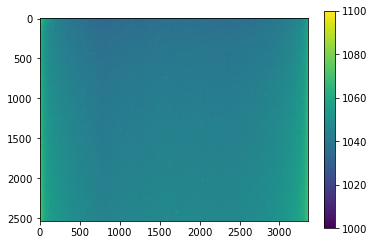

In [423]:
plt.imshow(median_01s, vmin=1000, vmax=1100)
plt.colorbar()

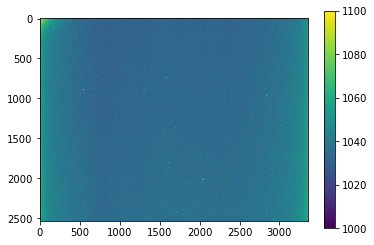

In [424]:
plt.imshow(median_1s, vmin=1000, vmax=1100)
plt.colorbar()

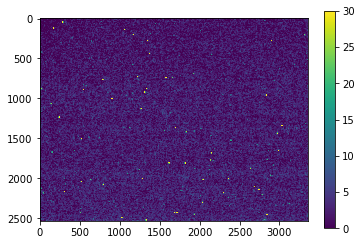

In [425]:
plt.imshow(diff1, vmin=0, vmax=30) 
plt.colorbar()

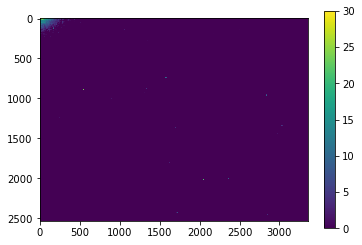

In [426]:
plt.imshow(diff2, vmin=0, vmax=30)
plt.colorbar()

### Dark current

In [28]:
dc_median = []
xtime = [0.1, 0.2, 1, 0.1, 0.2, 5, 0.1, 25, 0.1, 125, 0.1, 500, 0.1]
for i in range(len(dark_current_array)):
    dc_median.append(np.median(dark_current_array[i]))
print(dc_median)
print(len(dc_median))

[1036.0, 1033.0, 1036.0, 1035.0, 1037.0, 1039.0, 1038.0, 1037.0, 1037.0, 1047.0, 1033.0, 1075.0, 1036.0]
13


In [87]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(xtime,dc_median)
print(slope)
print(intercept)
print(std_err)

0.07867529901128564
1035.9469483499681
0.00365506814136466


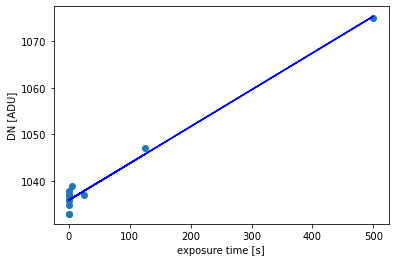

In [96]:
plt.scatter(xtime, dc_median)
abline_values1 = [slope * i + intercept for i in xtime]
plt.plot(xtime, abline_values1, 'b')
plt.errorbar(xtime, dc_median, yerr=std_err*np.ones(len(xtime)), ls='none')
plt.ylabel('DN [ADU]')
plt.xlabel('exposure time [s]')
plt.show()

In [31]:
dc_mean = []
dc_std = []
for i in range(len(dark_current_array)):
    counts, bins = np.histogram(1.*dark_current_array[i].ravel(), bins=np.arange(0, 1300, 1))
    #print(counts[0:10])
    popt, pcov = curve_fit(gauss, xdata=bins[:-1], ydata=counts, p0=[1,1000,50]) # had to change priors to make fit work
    fit = gauss(bins[:-1], *popt)
    dc_mean.append(popt[1])
    dc_std.append(popt[2])
print(dc_mean)
print(dc_std)


[1035.3571834553684, 1033.0416275979264, 1035.9753862474665, 1035.3174553181857, 1036.3970845781862, 1038.660332906387, 1038.202792608176, 1037.215928282981, 1037.177689646615, 1046.7064324530463, 1033.247659106731, 1074.8781160992614, 1036.1419156007776]
[-27.918377406451135, -27.893401005311585, 27.887999978570363, -27.974930398918964, 27.932677249540824, -28.025357476987697, 27.90962799657105, -28.20465718175768, 27.955655576601323, 28.664611475319592, 27.99544151015055, -30.958898259604048, 27.958643647097194]


[1.21052780e+05 1.03820279e+03 2.79096280e+01]


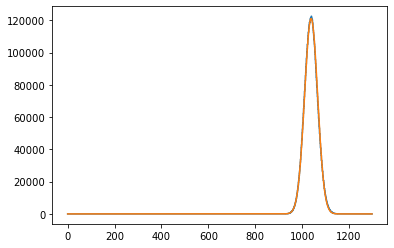

In [32]:
# example plot for one image
counts, bins = np.histogram(1.*dark_current_array[6].ravel(), bins=np.arange(0, 1300, 1))
from scipy.optimize import curve_fit
def gauss(x, a, mu, sigma):
          return a*np.exp(-.5*(x-mu)**2/(sigma**2))

popt, pcov = curve_fit(gauss, xdata=bins[:-1], ydata=counts, p0=[1,1000,50]) # had to change priors to make fit work
fit = gauss(bins[:-1], *popt)

plt.step(bins[:-1], counts)
plt.plot(bins[:-1], fit)
print(popt)


In [79]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(xtime,dc_mean)
print(slope)
print(intercept)
print(std_err)

0.07841939458295655
1035.9075432046234
0.0034343482557886757


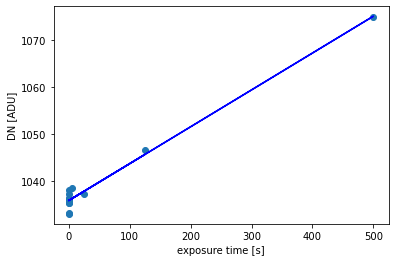

In [80]:
abline_values2 = [slope * i + intercept for i in xtime]
plt.plot(xtime, abline_values2, 'b')
plt.scatter(xtime, dc_mean)
plt.errorbar(xtime, dc_mean, yerr=std_err*np.ones(len(xtime)), ls='none')
plt.ylabel('DN [ADU]')
plt.xlabel('exposure time [s]')
plt.show()

In [97]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(xtime,dc_std)
print(slope)
print(intercept)
print(std_err)

-0.060016628747559184
4.98153544553586
0.060859872671669306


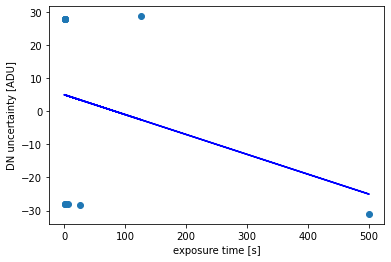

In [98]:
abline_values3 = [slope * i + intercept for i in xtime]
plt.plot(xtime, abline_values3, 'b')
plt.scatter(xtime, dc_std)
plt.errorbar(xtime, dc_std, yerr=std_err*np.ones(len(xtime)), ls='none')
plt.ylabel('DN uncertainty [ADU]')
plt.xlabel('exposure time [s]')
plt.show()

In [84]:
def reduced_chi_squared(yobs, ymodel, sigma):
    #print(yobs)
    #print(ymodel)
    numerator = [(yobs_i-ymodel_i)**2 for yobs_i, ymodel_i in zip(yobs, ymodel)]
    #print(numerator)
    term = numerator/(sigma**2)
    #print(term)
    chi_square = np.sum(term)
    #print(chi_square)
    reduced = chi_square/(len(yobs)-2) # divide by dof
    return reduced

fig7 = reduced_chi_squared(dc_std, abline_values3, std_err) # fig 7 reduced chi square
fig6 = reduced_chi_squared(dc_mean, abline_values2, std_err) # fig 6 reduced chi square
fig5 = reduced_chi_squared(dc_mean, abline_values1, std_err) # fig 6 reduced chi square
print(fig7)
print(fig6)
print(fig5)

[1082.0093933172034, 1079.972373584659, 527.4592569544903, 1085.733089781591, 527.3060342501667, 1069.7354059056759, 525.9726774124978, 1003.9884583018579, 528.0859976643263, 972.513868874678, 529.9161517821283, 35.190039761498795, 528.2233390407396]
[292125.15257706 291575.18997614 142405.52519015 293130.49079735
 142364.15752167 288811.37317046 142004.17259728 271060.75361127
 142574.73511256 262563.12013831 143068.84732102   9500.74537062
 142611.81507766]
[0.3115891252824078, 8.303615595488598, 0.00011185921612187299, 0.3575200766960413, 0.22454092523232988, 5.572870160040618, 5.232232906794125, 0.4252341311832663, 1.5934126571155836, 0.992942347858307, 7.11676221035942, 0.05718047716420142, 0.05131604781083255]
[8.41240578e+01 2.24184280e+03 3.02001912e-02 9.65246768e+01
 6.06224423e+01 1.50458541e+03 1.41261882e+03 1.14806384e+02
 4.30195818e+02 2.68078481e+02 1.92141146e+03 1.54378102e+01
 1.38545085e+01]
[0.35716451481487616, 8.532567055906858, 0.002523796510774252, 0.406228485

This is way high, but I'm not sure where my chi square calculation is going wrong...am I using the wrong value for sigma? 

In [85]:
from scipy.stats import chisquare
chisquare(dc_mean, abline_values2, len(dc_mean)-2)

Power_divergenceResult(statistic=0.02917710525168463, pvalue=0.8643707508924252)

In [86]:
chisquare(dc_std, abline_values3, len(dc_mean)-2)

Power_divergenceResult(statistic=1420.4713980220135, pvalue=7.481241600673e-311)

Looked into this implementation, and while the values look enticing, it's not quite the chi square that I want (measures frequency), so I don't trust it. It also doesn't take into account uncertainty. 

### Gain

In [99]:
file_names2 = glob('/Users/chris/Desktop/uf_grad_school/obs_tech/ccd_lab/gain_and_linearity/*.fits')
images2 = []
for i in range(len(file_names2)):
    images2.append(fits.getdata(np.sort(file_names2)[i]))

In [100]:
im_array2 = np.array(images2)
im_array2.shape

(40, 2532, 3352)

In [101]:
fits.getheader(np.sort(file_names2)[1])

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 3352 / length of data axis 1                          
NAXIS2  =                 2532 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
ROWORDER= 'TOP-DOWN'           / Row Order                                      
INSTRUME= 'SBIG CCD'           / CCD Name                                       
TELESCOP= 'Telescope Simulator' / Telescope name                                
OBSERVER= 'Unknown '           / Observer name                                  
OBJECT  = 'Unknown '        

In [102]:
g_start, g_end = 0, 2
gain_signal = []
gain_variance = []
for i in range(8): # for 8 different exposure times
    gain_array = im_array2[g_start:g_end,:,:]
    g1 = np.median(1.0*gain_array, axis=0) # median combine
    gain_signal.append(np.median(g1)) # get signal 
    std1 = np.std(1.0*gain_array, axis=0) # std combine
    gain_variance.append(np.median(std1)**2)
    
    # get next three images for next exposure time
    g_start += 3
    g_end += 3

print(gain_signal)
print(gain_variance)

[1088.5, 1401.5, 3006.5, 9345.5, 20303.5, 24349.0, 31061.5, 40027.5]
[361.0, 625.0, 2304.0, 32942.25, 18906.25, 61256.25, 17424.0, 25921.0]


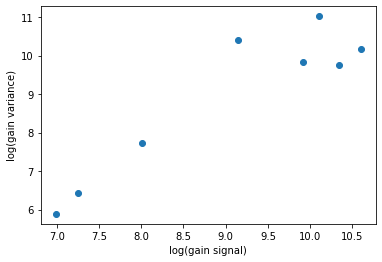

In [103]:
# plot in logspace to see which points to cut out...probably the last four?
plt.scatter(np.log(gain_signal), np.log(gain_variance))
plt.ylabel('log(gain variance)')
plt.xlabel('log(gain signal)')
plt.show()

In [104]:
# get slope of linear part
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(gain_signal[:-4],gain_variance[:-4]) # first 4 only
print(slope)
print(intercept)
print(std_err)

4.085413432793451
-6100.864042380099
0.484176852501357


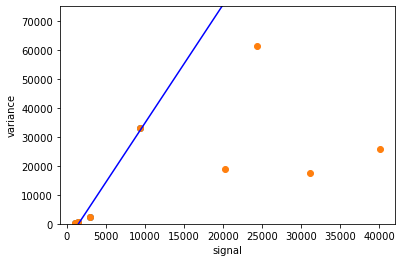

In [105]:
plt.scatter(gain_signal[:-4], gain_variance[:-4])
plt.scatter(gain_signal, gain_variance)
plt.ylabel('variance')
plt.xlabel('signal')

abline_values1 = [slope * i + intercept for i in gain_signal]
plt.plot(gain_signal, abline_values1, 'b')
plt.ylim(0, 75000)
plt.show()

This looks sketchy, but the logspace plot above, plus the fact that the variance starts wavering down and up after the fourth set, means, I was only comfortable fitting up to that. If I included the next two points, I'd get a slope of 2.0 and uncertainty of 0.6. 

In [462]:
# get slope of linear part
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(gain_signal[:-2],gain_variance[:-2]) # first 4 only
print(slope)
print(intercept)
print(std_err)

2.0153649794883153
-584.7302953612634
0.6434066210911611


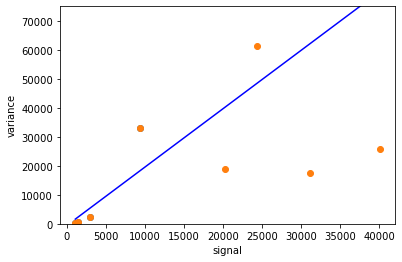

In [463]:
plt.scatter(gain_signal[:-4], gain_variance[:-4])
plt.scatter(gain_signal, gain_variance)
plt.ylabel('variance')
plt.xlabel('signal')

abline_values1 = [slope * i + intercept for i in gain_signal]
plt.plot(gain_signal, abline_values1, 'b')
plt.ylim(0, 75000)
plt.show()

### Linearity

In [434]:
l_bright = 1.*im_array2[24:32]
l_faint = 1.*im_array2[32:]
xtime_bright = [1, 3, 10, 30, 60, 100, 150, 200]
xtime_faint = [1, 3, 10, 30, 60, 100, 200, 300]

In [437]:
l_bright_median = [np.median(lb) for lb in l_bright]
print(l_bright_median)
l_faint_median = [np.median(lf) for lf in l_faint]
print(l_faint_median)

[1401.0, 2003.0, 4688.0, 11686.0, 22157.0, 35805.0, 65535.0, 51373.0]
[1252.0, 1520.0, 2760.0, 6302.0, 11664.0, 18597.0, 35993.0, 53023.0]


In [442]:
slope, intercept, r_value, p_value, std_err = stats.linregress(xtime_bright, l_bright_median) 
print(slope)
print(intercept)
print(r_value)
print(p_value)
print(std_err)

308.1716844536785
2990.1108515827655
0.9432788010936264
0.00043703406616721466
44.280986755102354


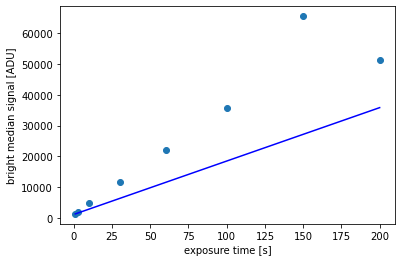

In [446]:
plt.scatter(xtime_bright, l_bright_median)
abline_values1 = [slope * i + intercept for i in xtime_bright]
plt.plot(xtime_bright, abline_values1, 'b')
plt.ylabel('bright median signal [ADU]')
plt.xlabel('exposure time [s]')
plt.show()

In [444]:
slope, intercept, r_value, p_value, std_err = stats.linregress(xtime_faint, l_faint_median) 
print(slope)
print(intercept)
print(r_value)
print(p_value)
print(std_err)

173.60381330300757
1111.7394293353336
0.9999778178800972
2.7286129058416273e-14
0.4720710659835241


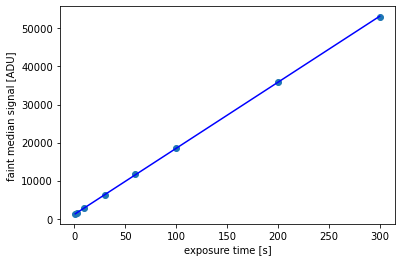

In [447]:
plt.scatter(xtime_faint, l_faint_median)
abline_values1 = [slope * i + intercept for i in xtime_faint]
plt.plot(xtime_faint, abline_values1, 'b')
plt.ylabel('faint median signal [ADU]')
plt.xlabel('exposure time [s]')
plt.show()

In [466]:
np.median(np.array(l_bright_median) - np.array(l_faint_median)) # difference in ADU between faint and bright

3656.0